In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score,recall_score,f1_score
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive', force_remount=True)
dataset_obuka = pd.read_csv('https://raw.githubusercontent.com/mvikic/speaker-gender-recognition/master/baza_neutral.csv')
dataset_obuka.head()


Mounted at /content/drive


,name,pcm_RMSenergy_sma_max,pcm_RMSenergy_sma_min,pcm_RMSenergy_sma_range,pcm_RMSenergy_sma_maxPos,pcm_RMSenergy_sma_minPos,pcm_RMSenergy_sma_amean,pcm_RMSenergy_sma_linregc1,pcm_RMSenergy_sma_linregc2,pcm_RMSenergy_sma_linregerrQ,...,F0_sma_de_amean,F0_sma_de_linregc1,F0_sma_de_linregc2,F0_sma_de_linregerrQ,F0_sma_de_stddev,F0_sma_de_skewness,F0_sma_de_kurtosis,class,age,gender
0,'norm_2_1_0_mvmd01n__01-03-21-09-30-10-0006.wav',0.034224,0.000683,0.033541,228.0,58.0,0.007787,-0.000022,0.010811,0.000037,...,0.000000e+00,0.000000,0.000000,0.0000,0.00000,0.000000,0.000000,p0006,42.0,M
1,'norm_2_1_0_mvmd01n__01-03-21-10-34-50-0005.wav',0.094245,0.000659,0.093586,223.0,186.0,0.014003,-0.000015,0.016184,0.000218,...,-4.427129e-08,-0.008472,1.211509,511.0406,22.61710,-0.078434,4.071894,p0005,37.0,F
2,'norm_2_1_0_mvmd01n__02-04-21-03-29-27-1007.wav',0.135660,0.000529,0.135131,66.0,231.0,0.016401,-0.000019,0.019596,0.000440,...,2.855338e-08,-0.002568,0.443014,317.8704,17.83077,0.140027,5.672993,p1007,35.0,F
3,'norm_2_1_0_mvmd01n__03-04-21-09-55-29-1008.wav',0.045491,0.000202,0.045289,79.0,339.0,0.008490,-0.000027,0.013327,0.000050,...,5.248369e-08,-0.007947,1.410540,404.5609,20.13027,-0.003891,4.712767,p1008,39.0,F
4,'norm_2_1_0_mvmd01n__03-04-21-11-38-46-1009.wav',0.092675,0.001377,0.091298,218.0,67.0,0.011916,0.000016,0.009727,0.000196,...,-7.889488e-08,-0.005969,0.817719,320.4470,17.90730,0.139588,7.677752,p1009,24.0,F


In [ ]:
classes = dataset_obuka.iloc[:,-3]
print(classes.unique())

classes_svi = classes.unique()
print(classes_svi)

classes_izbaci = ['p0006', 'p0005', 'p0001', 'p0002', 'p1007', 'p1008', 'p1009', 'p1060', 'p1010', 'p1011', 'p1012']
classes_ostavi = [i for i in classes_svi if i not in classes_izbaci]

print(classes_ostavi)
print(len(classes_ostavi))

['p0006' 'p0005' 'p1007' 'p1008' 'p1009' 'p1060' 'p1010' 'p1011' 'p1012'
 'p1061' 'p1013' 'p1014' 'p1015' 'p1016' 'p1017' 'p1019' 'p1049' 'p1003'
 'p1024' 'p1023' 'p1020' 'p1021' 'p1062' 'p1026' 'p1027' 'p1028' 'p1025'
 'p1030' 'p1031' 'p1032' 'p1033' 'p1034' 'p1036' 'p1004' 'p1037' 'p1038'
 'p1039' 'p1040' 'p1043' 'p1045' 'p1044' 'p1005' 'p1046' 'p1050' 'p1051'
 'p1047' 'p1052' 'p1053' 'p1054' 'p0001' 'p0002' 'p0003' 'p1057' 'p1058'
 'p1006']
['p0006' 'p0005' 'p1007' 'p1008' 'p1009' 'p1060' 'p1010' 'p1011' 'p1012'
 'p1061' 'p1013' 'p1014' 'p1015' 'p1016' 'p1017' 'p1019' 'p1049' 'p1003'
 'p1024' 'p1023' 'p1020' 'p1021' 'p1062' 'p1026' 'p1027' 'p1028' 'p1025'
 'p1030' 'p1031' 'p1032' 'p1033' 'p1034' 'p1036' 'p1004' 'p1037' 'p1038'
 'p1039' 'p1040' 'p1043' 'p1045' 'p1044' 'p1005' 'p1046' 'p1050' 'p1051'
 'p1047' 'p1052' 'p1053' 'p1054' 'p0001' 'p0002' 'p0003' 'p1057' 'p1058'
 'p1006']
['p1061', 'p1013', 'p1014', 'p1015', 'p1016', 'p1017', 'p1019', 'p1049', 'p1003', 'p1024', 'p1023', 'p10

In [ ]:
dataset_bezImena = dataset_obuka.drop(['name', 'age'], axis = 1)
dataset_bezImena.head()
print(dataset_bezImena.shape)

(3372, 386)


In [ ]:
dataset_bezImena_train = dataset_bezImena
for i in range(0, len(classes_izbaci)):    
    indexes_izb = dataset_bezImena_train.loc[dataset_bezImena_train['class'].str.find(classes_izbaci[i]) != -1].index
    dataset_bezImena_train.drop(indexes_izb, axis = 0, inplace = True)
dataset_train = dataset_bezImena_train

print(dataset_train.shape)

(2698, 386)


In [ ]:
dataset_train = dataset_train.drop(['class'], axis = 1)
dataset_train.head()

,pcm_RMSenergy_sma_max,pcm_RMSenergy_sma_min,pcm_RMSenergy_sma_range,pcm_RMSenergy_sma_maxPos,pcm_RMSenergy_sma_minPos,pcm_RMSenergy_sma_amean,pcm_RMSenergy_sma_linregc1,pcm_RMSenergy_sma_linregc2,pcm_RMSenergy_sma_linregerrQ,pcm_RMSenergy_sma_stddev,...,F0_sma_de_maxPos,F0_sma_de_minPos,F0_sma_de_amean,F0_sma_de_linregc1,F0_sma_de_linregc2,F0_sma_de_linregerrQ,F0_sma_de_stddev,F0_sma_de_skewness,F0_sma_de_kurtosis,gender
9,0.045257,0.000663,0.044594,264.0,235.0,0.009034,-7.162853e-06,0.010248,0.000050,0.007139,...,292.0,297.0,2.223122e-08,-0.002830,0.479608,452.6516,21.27742,-0.260020,8.177298,M
10,0.046709,0.001581,0.045128,204.0,108.0,0.008425,-5.279543e-06,0.009117,0.000041,0.006414,...,67.0,71.0,-2.334085e-01,-0.002348,0.074228,266.3562,16.32140,-0.098050,4.654404,M
11,0.055089,0.002300,0.052789,239.0,308.0,0.012595,-2.550780e-06,0.012996,0.000092,0.009577,...,12.0,8.0,3.765372e-08,-0.014929,2.351347,669.1466,25.90369,0.322016,4.528131,F
12,0.097138,0.000744,0.096394,254.0,183.0,0.018565,1.666536e-07,0.018543,0.000338,0.018373,...,6.0,127.0,-1.396640e-08,-0.014510,1.958808,595.7395,24.43416,0.125773,4.279946,F
13,0.074954,0.001254,0.073700,62.0,135.0,0.011308,-2.821091e-05,0.015159,0.000114,0.010902,...,204.0,207.0,0.000000e+00,-0.001518,0.207252,339.5236,18.42656,-0.002863,16.960740,M


In [ ]:
X_obuka= dataset_train.iloc[:, :-1]
y_obuka = dataset_train.iloc[:, -1]

X_obuka.head()

,pcm_RMSenergy_sma_max,pcm_RMSenergy_sma_min,pcm_RMSenergy_sma_range,pcm_RMSenergy_sma_maxPos,pcm_RMSenergy_sma_minPos,pcm_RMSenergy_sma_amean,pcm_RMSenergy_sma_linregc1,pcm_RMSenergy_sma_linregc2,pcm_RMSenergy_sma_linregerrQ,pcm_RMSenergy_sma_stddev,...,F0_sma_de_range,F0_sma_de_maxPos,F0_sma_de_minPos,F0_sma_de_amean,F0_sma_de_linregc1,F0_sma_de_linregc2,F0_sma_de_linregerrQ,F0_sma_de_stddev,F0_sma_de_skewness,F0_sma_de_kurtosis
9,0.045257,0.000663,0.044594,264.0,235.0,0.009034,-7.162853e-06,0.010248,0.000050,0.007139,...,186.0245,292.0,297.0,2.223122e-08,-0.002830,0.479608,452.6516,21.27742,-0.260020,8.177298
10,0.046709,0.001581,0.045128,204.0,108.0,0.008425,-5.279543e-06,0.009117,0.000041,0.006414,...,102.2652,67.0,71.0,-2.334085e-01,-0.002348,0.074228,266.3562,16.32140,-0.098050,4.654404
11,0.055089,0.002300,0.052789,239.0,308.0,0.012595,-2.550780e-06,0.012996,0.000092,0.009577,...,151.7801,12.0,8.0,3.765372e-08,-0.014929,2.351347,669.1466,25.90369,0.322016,4.528131
12,0.097138,0.000744,0.096394,254.0,183.0,0.018565,1.666536e-07,0.018543,0.000338,0.018373,...,134.4832,6.0,127.0,-1.396640e-08,-0.014510,1.958808,595.7395,24.43416,0.125773,4.279946
13,0.074954,0.001254,0.073700,62.0,135.0,0.011308,-2.821091e-05,0.015159,0.000114,0.010902,...,183.3595,204.0,207.0,0.000000e+00,-0.001518,0.207252,339.5236,18.42656,-0.002863,16.960740


In [ ]:
#Zenski i muski

print('Nedostajućih vrijednosti ima: ', X_obuka.isnull().sum().sum())
print('Oznake klasa su: ', y_obuka.unique())
pd.set_option('display.max_columns', None)
dataset_train.describe()

Nedostajućih vrijednosti ima:  0
Oznake klasa su:  ['M' 'F']


,pcm_RMSenergy_sma_max,pcm_RMSenergy_sma_min,pcm_RMSenergy_sma_range,pcm_RMSenergy_sma_maxPos,pcm_RMSenergy_sma_minPos,pcm_RMSenergy_sma_amean,pcm_RMSenergy_sma_linregc1,pcm_RMSenergy_sma_linregc2,pcm_RMSenergy_sma_linregerrQ,pcm_RMSenergy_sma_stddev,pcm_RMSenergy_sma_skewness,pcm_RMSenergy_sma_kurtosis,pcm_fftMag_mfcc_sma[1]_max,pcm_fftMag_mfcc_sma[1]_min,pcm_fftMag_mfcc_sma[1]_range,pcm_fftMag_mfcc_sma[1]_maxPos,pcm_fftMag_mfcc_sma[1]_minPos,pcm_fftMag_mfcc_sma[1]_amean,pcm_fftMag_mfcc_sma[1]_linregc1,pcm_fftMag_mfcc_sma[1]_linregc2,pcm_fftMag_mfcc_sma[1]_linregerrQ,pcm_fftMag_mfcc_sma[1]_stddev,pcm_fftMag_mfcc_sma[1]_skewness,pcm_fftMag_mfcc_sma[1]_kurtosis,pcm_fftMag_mfcc_sma[2]_max,pcm_fftMag_mfcc_sma[2]_min,pcm_fftMag_mfcc_sma[2]_range,pcm_fftMag_mfcc_sma[2]_maxPos,pcm_fftMag_mfcc_sma[2]_minPos,pcm_fftMag_mfcc_sma[2]_amean,pcm_fftMag_mfcc_sma[2]_linregc1,pcm_fftMag_mfcc_sma[2]_linregc2,pcm_fftMag_mfcc_sma[2]_linregerrQ,pcm_fftMag_mfcc_sma[2]_stddev,pcm_fftMag_mfcc_sma[2]_skewness,pcm_fftMag_mfcc_sma[2]_kurtosis,pcm_fftMag_mfcc_sma[3]_max,pcm_fftMag_mfcc_sma[3]_min,pcm_fftMag_mfcc_sma[3]_range,pcm_fftMag_mfcc_sma[3]_maxPos,pcm_fftMag_mfcc_sma[3]_minPos,pcm_fftMag_mfcc_sma[3]_amean,pcm_fftMag_mfcc_sma[3]_linregc1,pcm_fftMag_mfcc_sma[3]_linregc2,pcm_fftMag_mfcc_sma[3]_linregerrQ,pcm_fftMag_mfcc_sma[3]_stddev,pcm_fftMag_mfcc_sma[3]_skewness,pcm_fftMag_mfcc_sma[3]_kurtosis,pcm_fftMag_mfcc_sma[4]_max,pcm_fftMag_mfcc_sma[4]_min,pcm_fftMag_mfcc_sma[4]_range,pcm_fftMag_mfcc_sma[4]_maxPos,pcm_fftMag_mfcc_sma[4]_minPos,pcm_fftMag_mfcc_sma[4]_amean,pcm_fftMag_mfcc_sma[4]_linregc1,pcm_fftMag_mfcc_sma[4]_linregc2,pcm_fftMag_mfcc_sma[4]_linregerrQ,pcm_fftMag_mfcc_sma[4]_stddev,pcm_fftMag_mfcc_sma[4]_skewness,pcm_fftMag_mfcc_sma[4]_kurtosis,pcm_fftMag_mfcc_sma[5]_max,pcm_fftMag_mfcc_sma[5]_min,pcm_fftMag_mfcc_sma[5]_range,pcm_fftMag_mfcc_sma[5]_maxPos,pcm_fftMag_mfcc_sma[5]_minPos,pcm_fftMag_mfcc_sma[5]_amean,pcm_fftMag_mfcc_sma[5]_linregc1,pcm_fftMag_mfcc_sma[5]_linregc2,pcm_fftMag_mfcc_sma[5]_linregerrQ,pcm_fftMag_mfcc_sma[5]_stddev,pcm_fftMag_mfcc_sma[5]_skewness,pcm_fftMag_mfcc_sma[5]_kurtosis,pcm_fftMag_mfcc_sma[6]_max,pcm_fftMag_mfcc_sma[6]_min,pcm_fftMag_mfcc_sma[6]_range,pcm_fftMag_mfcc_sma[6]_maxPos,pcm_fftMag_mfcc_sma[6]_minPos,pcm_fftMag_mfcc_sma[6]_amean,pcm_fftMag_mfcc_sma[6]_linregc1,pcm_fftMag_mfcc_sma[6]_linregc2,pcm_fftMag_mfcc_sma[6]_linregerrQ,pcm_fftMag_mfcc_sma[6]_stddev,pcm_fftMag_mfcc_sma[6]_skewness,pcm_fftMag_mfcc_sma[6]_kurtosis,pcm_fftMag_mfcc_sma[7]_max,pcm_fftMag_mfcc_sma[7]_min,pcm_fftMag_mfcc_sma[7]_range,pcm_fftMag_mfcc_sma[7]_maxPos,pcm_fftMag_mfcc_sma[7]_minPos,pcm_fftMag_mfcc_sma[7]_amean,pcm_fftMag_mfcc_sma[7]_linregc1,pcm_fftMag_mfcc_sma[7]_linregc2,pcm_fftMag_mfcc_sma[7]_linregerrQ,pcm_fftMag_mfcc_sma[7]_stddev,pcm_fftMag_mfcc_sma[7]_skewness,pcm_fftMag_mfcc_sma[7]_kurtosis,pcm_fftMag_mfcc_sma[8]_max,pcm_fftMag_mfcc_sma[8]_min,pcm_fftMag_mfcc_sma[8]_range,pcm_fftMag_mfcc_sma[8]_maxPos,pcm_fftMag_mfcc_sma[8]_minPos,pcm_fftMag_mfcc_sma[8]_amean,pcm_fftMag_mfcc_sma[8]_linregc1,pcm_fftMag_mfcc_sma[8]_linregc2,pcm_fftMag_mfcc_sma[8]_linregerrQ,pcm_fftMag_mfcc_sma[8]_stddev,pcm_fftMag_mfcc_sma[8]_skewness,pcm_fftMag_mfcc_sma[8]_kurtosis,pcm_fftMag_mfcc_sma[9]_max,pcm_fftMag_mfcc_sma[9]_min,pcm_fftMag_mfcc_sma[9]_range,pcm_fftMag_mfcc_sma[9]_maxPos,pcm_fftMag_mfcc_sma[9]_minPos,pcm_fftMag_mfcc_sma[9]_amean,pcm_fftMag_mfcc_sma[9]_linregc1,pcm_fftMag_mfcc_sma[9]_linregc2,pcm_fftMag_mfcc_sma[9]_linregerrQ,pcm_fftMag_mfcc_sma[9]_stddev,pcm_fftMag_mfcc_sma[9]_skewness,pcm_fftMag_mfcc_sma[9]_kurtosis,pcm_fftMag_mfcc_sma[10]_max,pcm_fftMag_mfcc_sma[10]_min,pcm_fftMag_mfcc_sma[10]_range,pcm_fftMag_mfcc_sma[10]_maxPos,pcm_fftMag_mfcc_sma[10]_minPos,pcm_fftMag_mfcc_sma[10]_amean,pcm_fftMag_mfcc_sma[10]_linregc1,pcm_fftMag_mfcc_sma[10]_linregc2,pcm_fftMag_mfcc_sma[10]_linregerrQ,pcm_fftMag_mfcc_sma[10]_stddev,pcm_fftMag_mfcc_sma[10]_skewness,pcm_fftMag_mfcc_sma[10]_kurtosis,pcm_fftMag_mfcc_sma[11]_max,pcm_fftMag_mfcc

In [ ]:
#Muski uzorci
male = dataset_train[dataset_train['gender'] == 'M']
male_sum = sum(dataset_train['gender'] == 'M')
print('Klasi MALE pripada: ',male_sum, ' uzoraka')
pd.set_option('display.max_columns', None)
male.describe()

Klasi MALE pripada:  1398  uzoraka


,pcm_RMSenergy_sma_max,pcm_RMSenergy_sma_min,pcm_RMSenergy_sma_range,pcm_RMSenergy_sma_maxPos,pcm_RMSenergy_sma_minPos,pcm_RMSenergy_sma_amean,pcm_RMSenergy_sma_linregc1,pcm_RMSenergy_sma_linregc2,pcm_RMSenergy_sma_linregerrQ,pcm_RMSenergy_sma_stddev,pcm_RMSenergy_sma_skewness,pcm_RMSenergy_sma_kurtosis,pcm_fftMag_mfcc_sma[1]_max,pcm_fftMag_mfcc_sma[1]_min,pcm_fftMag_mfcc_sma[1]_range,pcm_fftMag_mfcc_sma[1]_maxPos,pcm_fftMag_mfcc_sma[1]_minPos,pcm_fftMag_mfcc_sma[1]_amean,pcm_fftMag_mfcc_sma[1]_linregc1,pcm_fftMag_mfcc_sma[1]_linregc2,pcm_fftMag_mfcc_sma[1]_linregerrQ,pcm_fftMag_mfcc_sma[1]_stddev,pcm_fftMag_mfcc_sma[1]_skewness,pcm_fftMag_mfcc_sma[1]_kurtosis,pcm_fftMag_mfcc_sma[2]_max,pcm_fftMag_mfcc_sma[2]_min,pcm_fftMag_mfcc_sma[2]_range,pcm_fftMag_mfcc_sma[2]_maxPos,pcm_fftMag_mfcc_sma[2]_minPos,pcm_fftMag_mfcc_sma[2]_amean,pcm_fftMag_mfcc_sma[2]_linregc1,pcm_fftMag_mfcc_sma[2]_linregc2,pcm_fftMag_mfcc_sma[2]_linregerrQ,pcm_fftMag_mfcc_sma[2]_stddev,pcm_fftMag_mfcc_sma[2]_skewness,pcm_fftMag_mfcc_sma[2]_kurtosis,pcm_fftMag_mfcc_sma[3]_max,pcm_fftMag_mfcc_sma[3]_min,pcm_fftMag_mfcc_sma[3]_range,pcm_fftMag_mfcc_sma[3]_maxPos,pcm_fftMag_mfcc_sma[3]_minPos,pcm_fftMag_mfcc_sma[3]_amean,pcm_fftMag_mfcc_sma[3]_linregc1,pcm_fftMag_mfcc_sma[3]_linregc2,pcm_fftMag_mfcc_sma[3]_linregerrQ,pcm_fftMag_mfcc_sma[3]_stddev,pcm_fftMag_mfcc_sma[3]_skewness,pcm_fftMag_mfcc_sma[3]_kurtosis,pcm_fftMag_mfcc_sma[4]_max,pcm_fftMag_mfcc_sma[4]_min,pcm_fftMag_mfcc_sma[4]_range,pcm_fftMag_mfcc_sma[4]_maxPos,pcm_fftMag_mfcc_sma[4]_minPos,pcm_fftMag_mfcc_sma[4]_amean,pcm_fftMag_mfcc_sma[4]_linregc1,pcm_fftMag_mfcc_sma[4]_linregc2,pcm_fftMag_mfcc_sma[4]_linregerrQ,pcm_fftMag_mfcc_sma[4]_stddev,pcm_fftMag_mfcc_sma[4]_skewness,pcm_fftMag_mfcc_sma[4]_kurtosis,pcm_fftMag_mfcc_sma[5]_max,pcm_fftMag_mfcc_sma[5]_min,pcm_fftMag_mfcc_sma[5]_range,pcm_fftMag_mfcc_sma[5]_maxPos,pcm_fftMag_mfcc_sma[5]_minPos,pcm_fftMag_mfcc_sma[5]_amean,pcm_fftMag_mfcc_sma[5]_linregc1,pcm_fftMag_mfcc_sma[5]_linregc2,pcm_fftMag_mfcc_sma[5]_linregerrQ,pcm_fftMag_mfcc_sma[5]_stddev,pcm_fftMag_mfcc_sma[5]_skewness,pcm_fftMag_mfcc_sma[5]_kurtosis,pcm_fftMag_mfcc_sma[6]_max,pcm_fftMag_mfcc_sma[6]_min,pcm_fftMag_mfcc_sma[6]_range,pcm_fftMag_mfcc_sma[6]_maxPos,pcm_fftMag_mfcc_sma[6]_minPos,pcm_fftMag_mfcc_sma[6]_amean,pcm_fftMag_mfcc_sma[6]_linregc1,pcm_fftMag_mfcc_sma[6]_linregc2,pcm_fftMag_mfcc_sma[6]_linregerrQ,pcm_fftMag_mfcc_sma[6]_stddev,pcm_fftMag_mfcc_sma[6]_skewness,pcm_fftMag_mfcc_sma[6]_kurtosis,pcm_fftMag_mfcc_sma[7]_max,pcm_fftMag_mfcc_sma[7]_min,pcm_fftMag_mfcc_sma[7]_range,pcm_fftMag_mfcc_sma[7]_maxPos,pcm_fftMag_mfcc_sma[7]_minPos,pcm_fftMag_mfcc_sma[7]_amean,pcm_fftMag_mfcc_sma[7]_linregc1,pcm_fftMag_mfcc_sma[7]_linregc2,pcm_fftMag_mfcc_sma[7]_linregerrQ,pcm_fftMag_mfcc_sma[7]_stddev,pcm_fftMag_mfcc_sma[7]_skewness,pcm_fftMag_mfcc_sma[7]_kurtosis,pcm_fftMag_mfcc_sma[8]_max,pcm_fftMag_mfcc_sma[8]_min,pcm_fftMag_mfcc_sma[8]_range,pcm_fftMag_mfcc_sma[8]_maxPos,pcm_fftMag_mfcc_sma[8]_minPos,pcm_fftMag_mfcc_sma[8]_amean,pcm_fftMag_mfcc_sma[8]_linregc1,pcm_fftMag_mfcc_sma[8]_linregc2,pcm_fftMag_mfcc_sma[8]_linregerrQ,pcm_fftMag_mfcc_sma[8]_stddev,pcm_fftMag_mfcc_sma[8]_skewness,pcm_fftMag_mfcc_sma[8]_kurtosis,pcm_fftMag_mfcc_sma[9]_max,pcm_fftMag_mfcc_sma[9]_min,pcm_fftMag_mfcc_sma[9]_range,pcm_fftMag_mfcc_sma[9]_maxPos,pcm_fftMag_mfcc_sma[9]_minPos,pcm_fftMag_mfcc_sma[9]_amean,pcm_fftMag_mfcc_sma[9]_linregc1,pcm_fftMag_mfcc_sma[9]_linregc2,pcm_fftMag_mfcc_sma[9]_linregerrQ,pcm_fftMag_mfcc_sma[9]_stddev,pcm_fftMag_mfcc_sma[9]_skewness,pcm_fftMag_mfcc_sma[9]_kurtosis,pcm_fftMag_mfcc_sma[10]_max,pcm_fftMag_mfcc_sma[10]_min,pcm_fftMag_mfcc_sma[10]_range,pcm_fftMag_mfcc_sma[10]_maxPos,pcm_fftMag_mfcc_sma[10]_minPos,pcm_fftMag_mfcc_sma[10]_amean,pcm_fftMag_mfcc_sma[10]_linregc1,pcm_fftMag_mfcc_sma[10]_linregc2,pcm_fftMag_mfcc_sma[10]_linregerrQ,pcm_fftMag_mfcc_sma[10]_stddev,pcm_fftMag_mfcc_sma[10]_skewness,pcm_fftMag_mfcc_sma[10]_kurtosis,pcm_fftMag_mfcc_sma[11]_max,pcm_fftMag_mfcc

In [ ]:
#Zenski uzorci
female = dataset_train[dataset_train['gender'] == 'F']
female_sum = sum(dataset_train['gender'] == 'F')
print('Klasi FEMALE: ',female_sum, ' uzoraka')
pd.set_option('display.max_columns', None)
female.describe()

Klasi FEMALE:  1300  uzoraka


,pcm_RMSenergy_sma_max,pcm_RMSenergy_sma_min,pcm_RMSenergy_sma_range,pcm_RMSenergy_sma_maxPos,pcm_RMSenergy_sma_minPos,pcm_RMSenergy_sma_amean,pcm_RMSenergy_sma_linregc1,pcm_RMSenergy_sma_linregc2,pcm_RMSenergy_sma_linregerrQ,pcm_RMSenergy_sma_stddev,pcm_RMSenergy_sma_skewness,pcm_RMSenergy_sma_kurtosis,pcm_fftMag_mfcc_sma[1]_max,pcm_fftMag_mfcc_sma[1]_min,pcm_fftMag_mfcc_sma[1]_range,pcm_fftMag_mfcc_sma[1]_maxPos,pcm_fftMag_mfcc_sma[1]_minPos,pcm_fftMag_mfcc_sma[1]_amean,pcm_fftMag_mfcc_sma[1]_linregc1,pcm_fftMag_mfcc_sma[1]_linregc2,pcm_fftMag_mfcc_sma[1]_linregerrQ,pcm_fftMag_mfcc_sma[1]_stddev,pcm_fftMag_mfcc_sma[1]_skewness,pcm_fftMag_mfcc_sma[1]_kurtosis,pcm_fftMag_mfcc_sma[2]_max,pcm_fftMag_mfcc_sma[2]_min,pcm_fftMag_mfcc_sma[2]_range,pcm_fftMag_mfcc_sma[2]_maxPos,pcm_fftMag_mfcc_sma[2]_minPos,pcm_fftMag_mfcc_sma[2]_amean,pcm_fftMag_mfcc_sma[2]_linregc1,pcm_fftMag_mfcc_sma[2]_linregc2,pcm_fftMag_mfcc_sma[2]_linregerrQ,pcm_fftMag_mfcc_sma[2]_stddev,pcm_fftMag_mfcc_sma[2]_skewness,pcm_fftMag_mfcc_sma[2]_kurtosis,pcm_fftMag_mfcc_sma[3]_max,pcm_fftMag_mfcc_sma[3]_min,pcm_fftMag_mfcc_sma[3]_range,pcm_fftMag_mfcc_sma[3]_maxPos,pcm_fftMag_mfcc_sma[3]_minPos,pcm_fftMag_mfcc_sma[3]_amean,pcm_fftMag_mfcc_sma[3]_linregc1,pcm_fftMag_mfcc_sma[3]_linregc2,pcm_fftMag_mfcc_sma[3]_linregerrQ,pcm_fftMag_mfcc_sma[3]_stddev,pcm_fftMag_mfcc_sma[3]_skewness,pcm_fftMag_mfcc_sma[3]_kurtosis,pcm_fftMag_mfcc_sma[4]_max,pcm_fftMag_mfcc_sma[4]_min,pcm_fftMag_mfcc_sma[4]_range,pcm_fftMag_mfcc_sma[4]_maxPos,pcm_fftMag_mfcc_sma[4]_minPos,pcm_fftMag_mfcc_sma[4]_amean,pcm_fftMag_mfcc_sma[4]_linregc1,pcm_fftMag_mfcc_sma[4]_linregc2,pcm_fftMag_mfcc_sma[4]_linregerrQ,pcm_fftMag_mfcc_sma[4]_stddev,pcm_fftMag_mfcc_sma[4]_skewness,pcm_fftMag_mfcc_sma[4]_kurtosis,pcm_fftMag_mfcc_sma[5]_max,pcm_fftMag_mfcc_sma[5]_min,pcm_fftMag_mfcc_sma[5]_range,pcm_fftMag_mfcc_sma[5]_maxPos,pcm_fftMag_mfcc_sma[5]_minPos,pcm_fftMag_mfcc_sma[5]_amean,pcm_fftMag_mfcc_sma[5]_linregc1,pcm_fftMag_mfcc_sma[5]_linregc2,pcm_fftMag_mfcc_sma[5]_linregerrQ,pcm_fftMag_mfcc_sma[5]_stddev,pcm_fftMag_mfcc_sma[5]_skewness,pcm_fftMag_mfcc_sma[5]_kurtosis,pcm_fftMag_mfcc_sma[6]_max,pcm_fftMag_mfcc_sma[6]_min,pcm_fftMag_mfcc_sma[6]_range,pcm_fftMag_mfcc_sma[6]_maxPos,pcm_fftMag_mfcc_sma[6]_minPos,pcm_fftMag_mfcc_sma[6]_amean,pcm_fftMag_mfcc_sma[6]_linregc1,pcm_fftMag_mfcc_sma[6]_linregc2,pcm_fftMag_mfcc_sma[6]_linregerrQ,pcm_fftMag_mfcc_sma[6]_stddev,pcm_fftMag_mfcc_sma[6]_skewness,pcm_fftMag_mfcc_sma[6]_kurtosis,pcm_fftMag_mfcc_sma[7]_max,pcm_fftMag_mfcc_sma[7]_min,pcm_fftMag_mfcc_sma[7]_range,pcm_fftMag_mfcc_sma[7]_maxPos,pcm_fftMag_mfcc_sma[7]_minPos,pcm_fftMag_mfcc_sma[7]_amean,pcm_fftMag_mfcc_sma[7]_linregc1,pcm_fftMag_mfcc_sma[7]_linregc2,pcm_fftMag_mfcc_sma[7]_linregerrQ,pcm_fftMag_mfcc_sma[7]_stddev,pcm_fftMag_mfcc_sma[7]_skewness,pcm_fftMag_mfcc_sma[7]_kurtosis,pcm_fftMag_mfcc_sma[8]_max,pcm_fftMag_mfcc_sma[8]_min,pcm_fftMag_mfcc_sma[8]_range,pcm_fftMag_mfcc_sma[8]_maxPos,pcm_fftMag_mfcc_sma[8]_minPos,pcm_fftMag_mfcc_sma[8]_amean,pcm_fftMag_mfcc_sma[8]_linregc1,pcm_fftMag_mfcc_sma[8]_linregc2,pcm_fftMag_mfcc_sma[8]_linregerrQ,pcm_fftMag_mfcc_sma[8]_stddev,pcm_fftMag_mfcc_sma[8]_skewness,pcm_fftMag_mfcc_sma[8]_kurtosis,pcm_fftMag_mfcc_sma[9]_max,pcm_fftMag_mfcc_sma[9]_min,pcm_fftMag_mfcc_sma[9]_range,pcm_fftMag_mfcc_sma[9]_maxPos,pcm_fftMag_mfcc_sma[9]_minPos,pcm_fftMag_mfcc_sma[9]_amean,pcm_fftMag_mfcc_sma[9]_linregc1,pcm_fftMag_mfcc_sma[9]_linregc2,pcm_fftMag_mfcc_sma[9]_linregerrQ,pcm_fftMag_mfcc_sma[9]_stddev,pcm_fftMag_mfcc_sma[9]_skewness,pcm_fftMag_mfcc_sma[9]_kurtosis,pcm_fftMag_mfcc_sma[10]_max,pcm_fftMag_mfcc_sma[10]_min,pcm_fftMag_mfcc_sma[10]_range,pcm_fftMag_mfcc_sma[10]_maxPos,pcm_fftMag_mfcc_sma[10]_minPos,pcm_fftMag_mfcc_sma[10]_amean,pcm_fftMag_mfcc_sma[10]_linregc1,pcm_fftMag_mfcc_sma[10]_linregc2,pcm_fftMag_mfcc_sma[10]_linregerrQ,pcm_fftMag_mfcc_sma[10]_stddev,pcm_fftMag_mfcc_sma[10]_skewness,pcm_fftMag_mfcc_sma[10]_kurtosis,pcm_fftMag_mfcc_sma[11]_max,pcm_fftMag_mfcc

In [ ]:
"""# #ODABIR PARAMETARA ZA KNN METODU SA STANDARDIZOVANIM VREDNOSTIMA NA CELOM SKUPU POMOCU GRIDSEARCH
s = StandardScaler()
X_std = s.fit_transform(X_obuka)
from sklearn.model_selection import GridSearchCV
parameters = {'metric':('euclidean', 'manhattan','chebyshev','hamming'), 'n_neighbors':[1,5,15,20,30,35],'weights':['uniform','distance']}
knn = KNeighborsClassifier()
clf=GridSearchCV(knn, parameters,cv = 10)
clf.fit(X_std, y_obuka)
print(clf.best_score_)
print(clf.best_params_)"""

"# #ODABIR PARAMETARA ZA KNN METODU SA STANDARDIZOVANIM VREDNOSTIMA NA CELOM SKUPU POMOCU GRIDSEARCH\ns = StandardScaler()\nX_std = s.fit_transform(X_obuka)\nfrom sklearn.model_selection import GridSearchCV\nparameters = {'metric':('euclidean', 'manhattan','chebyshev','hamming'), 'n_neighbors':[1,5,15,20,30,35],'weights':['uniform','distance']}\nknn = KNeighborsClassifier()\nclf=GridSearchCV(knn, parameters,cv = 10)\nclf.fit(X_std, y_obuka)\nprint(clf.best_score_)\nprint(clf.best_params_)"

In [ ]:
# #ODABIR PARAMETARA ZA KNN METODU SA STANDARDIZOVANIM VREDNOSTIMA NA CELOM SKUPU - FOR PETLJA
labels_y = ['M', 'F']
s = StandardScaler()
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
acc = []
iteracija = 0 
for k in [1,5,15,25,35]:
     for m in ['euclidean', 'manhattan','chebyshev','hamming']:
         for l in ['uniform','distance']:
             indexes = kf.split(X_obuka, y_obuka)
             acc_tmp = []
             fin_conf_mat = np.zeros((len(np.unique(y_obuka)),len(np.unique(y_obuka))))
             for train_index, test_index in indexes:
                 iteracija += 1
                 pd.set_option('display.max_rows', None)
                 #print(X_obuka.iloc[train_index,:].dtypes)
                 classifier = KNeighborsClassifier(n_neighbors=k, metric=m,weights=l)  
                 X_std1 = s.fit_transform(X_obuka.iloc[train_index,:])
                 X_std_test = s.transform(X_obuka.iloc[test_index,:])
                 classifier.fit(X_std1, y_obuka.iloc[train_index])
                 #classifier.fit(X_obuka[train_index, :], y_train.iloc[train_index])
                 y_pred = classifier.predict(X_std_test)
                 acc_tmp.append(accuracy_score(y_obuka.iloc[test_index], y_pred))
                 fin_conf_mat += confusion_matrix(y_obuka.iloc[test_index], y_pred, labels=labels_y)
             print(int(iteracija/10))
             print('za parametre k=', k, ' i m=', m, 'weigth je:',l,' tacnost je: ', np.mean(acc_tmp), ' a mat. konf. je:')
             print(fin_conf_mat)
             acc.append(np.mean(acc_tmp))
print('najbolja tacnost je u iteraciji broj: ', np.argmax(acc))

1
za parametre k= 1  i m= euclidean weigth je: uniform  tacnost je:  0.9755293955665703  a mat. konf. je:
[[1360.   38.]
 [  28. 1272.]]
2
za parametre k= 1  i m= euclidean weigth je: distance  tacnost je:  0.9755293955665703  a mat. konf. je:
[[1360.   38.]
 [  28. 1272.]]
3
za parametre k= 1  i m= manhattan weigth je: uniform  tacnost je:  0.9777598788379459  a mat. konf. je:
[[1365.   33.]
 [  27. 1273.]]
4
za parametre k= 1  i m= manhattan weigth je: distance  tacnost je:  0.9777598788379459  a mat. konf. je:
[[1365.   33.]
 [  27. 1273.]]
5
za parametre k= 1  i m= chebyshev weigth je: uniform  tacnost je:  0.7731736197163707  a mat. konf. je:
[[1017.  381.]
 [ 231. 1069.]]
6
za parametre k= 1  i m= chebyshev weigth je: distance  tacnost je:  0.7731736197163707  a mat. konf. je:
[[1017.  381.]
 [ 231. 1069.]]
7
za parametre k= 1  i m= hamming weigth je: uniform  tacnost je:  0.6115585846069117  a mat. konf. je:
[[933. 465.]
 [583. 717.]]
8
za parametre k= 1  i m= hamming weigth je:

In [ ]:
dataset_bezImena_test = dataset_obuka.drop(['name', 'age'], axis = 1)
indeksi_svi = []
for i in range(0, len(classes_ostavi)):    
    indexes_ost = dataset_bezImena_test.loc[dataset_bezImena_test['class'].str.find(classes_ostavi[i]) != -1].index
    indeksi_svi.append(indexes_ost)
    dataset_bezImena_test.drop(indexes_ost, axis = 0, inplace = True)
dataset_test = dataset_bezImena_test

print(dataset_test.shape)
dataset_test.head()

(674, 386)


,pcm_RMSenergy_sma_max,pcm_RMSenergy_sma_min,pcm_RMSenergy_sma_range,pcm_RMSenergy_sma_maxPos,pcm_RMSenergy_sma_minPos,pcm_RMSenergy_sma_amean,pcm_RMSenergy_sma_linregc1,pcm_RMSenergy_sma_linregc2,pcm_RMSenergy_sma_linregerrQ,pcm_RMSenergy_sma_stddev,pcm_RMSenergy_sma_skewness,pcm_RMSenergy_sma_kurtosis,pcm_fftMag_mfcc_sma[1]_max,pcm_fftMag_mfcc_sma[1]_min,pcm_fftMag_mfcc_sma[1]_range,pcm_fftMag_mfcc_sma[1]_maxPos,pcm_fftMag_mfcc_sma[1]_minPos,pcm_fftMag_mfcc_sma[1]_amean,pcm_fftMag_mfcc_sma[1]_linregc1,pcm_fftMag_mfcc_sma[1]_linregc2,pcm_fftMag_mfcc_sma[1]_linregerrQ,pcm_fftMag_mfcc_sma[1]_stddev,pcm_fftMag_mfcc_sma[1]_skewness,pcm_fftMag_mfcc_sma[1]_kurtosis,pcm_fftMag_mfcc_sma[2]_max,pcm_fftMag_mfcc_sma[2]_min,pcm_fftMag_mfcc_sma[2]_range,pcm_fftMag_mfcc_sma[2]_maxPos,pcm_fftMag_mfcc_sma[2]_minPos,pcm_fftMag_mfcc_sma[2]_amean,pcm_fftMag_mfcc_sma[2]_linregc1,pcm_fftMag_mfcc_sma[2]_linregc2,pcm_fftMag_mfcc_sma[2]_linregerrQ,pcm_fftMag_mfcc_sma[2]_stddev,pcm_fftMag_mfcc_sma[2]_skewness,pcm_fftMag_mfcc_sma[2]_kurtosis,pcm_fftMag_mfcc_sma[3]_max,pcm_fftMag_mfcc_sma[3]_min,pcm_fftMag_mfcc_sma[3]_range,pcm_fftMag_mfcc_sma[3]_maxPos,pcm_fftMag_mfcc_sma[3]_minPos,pcm_fftMag_mfcc_sma[3]_amean,pcm_fftMag_mfcc_sma[3]_linregc1,pcm_fftMag_mfcc_sma[3]_linregc2,pcm_fftMag_mfcc_sma[3]_linregerrQ,pcm_fftMag_mfcc_sma[3]_stddev,pcm_fftMag_mfcc_sma[3]_skewness,pcm_fftMag_mfcc_sma[3]_kurtosis,pcm_fftMag_mfcc_sma[4]_max,pcm_fftMag_mfcc_sma[4]_min,pcm_fftMag_mfcc_sma[4]_range,pcm_fftMag_mfcc_sma[4]_maxPos,pcm_fftMag_mfcc_sma[4]_minPos,pcm_fftMag_mfcc_sma[4]_amean,pcm_fftMag_mfcc_sma[4]_linregc1,pcm_fftMag_mfcc_sma[4]_linregc2,pcm_fftMag_mfcc_sma[4]_linregerrQ,pcm_fftMag_mfcc_sma[4]_stddev,pcm_fftMag_mfcc_sma[4]_skewness,pcm_fftMag_mfcc_sma[4]_kurtosis,pcm_fftMag_mfcc_sma[5]_max,pcm_fftMag_mfcc_sma[5]_min,pcm_fftMag_mfcc_sma[5]_range,pcm_fftMag_mfcc_sma[5]_maxPos,pcm_fftMag_mfcc_sma[5]_minPos,pcm_fftMag_mfcc_sma[5]_amean,pcm_fftMag_mfcc_sma[5]_linregc1,pcm_fftMag_mfcc_sma[5]_linregc2,pcm_fftMag_mfcc_sma[5]_linregerrQ,pcm_fftMag_mfcc_sma[5]_stddev,pcm_fftMag_mfcc_sma[5]_skewness,pcm_fftMag_mfcc_sma[5]_kurtosis,pcm_fftMag_mfcc_sma[6]_max,pcm_fftMag_mfcc_sma[6]_min,pcm_fftMag_mfcc_sma[6]_range,pcm_fftMag_mfcc_sma[6]_maxPos,pcm_fftMag_mfcc_sma[6]_minPos,pcm_fftMag_mfcc_sma[6]_amean,pcm_fftMag_mfcc_sma[6]_linregc1,pcm_fftMag_mfcc_sma[6]_linregc2,pcm_fftMag_mfcc_sma[6]_linregerrQ,pcm_fftMag_mfcc_sma[6]_stddev,pcm_fftMag_mfcc_sma[6]_skewness,pcm_fftMag_mfcc_sma[6]_kurtosis,pcm_fftMag_mfcc_sma[7]_max,pcm_fftMag_mfcc_sma[7]_min,pcm_fftMag_mfcc_sma[7]_range,pcm_fftMag_mfcc_sma[7]_maxPos,pcm_fftMag_mfcc_sma[7]_minPos,pcm_fftMag_mfcc_sma[7]_amean,pcm_fftMag_mfcc_sma[7]_linregc1,pcm_fftMag_mfcc_sma[7]_linregc2,pcm_fftMag_mfcc_sma[7]_linregerrQ,pcm_fftMag_mfcc_sma[7]_stddev,pcm_fftMag_mfcc_sma[7]_skewness,pcm_fftMag_mfcc_sma[7]_kurtosis,pcm_fftMag_mfcc_sma[8]_max,pcm_fftMag_mfcc_sma[8]_min,pcm_fftMag_mfcc_sma[8]_range,pcm_fftMag_mfcc_sma[8]_maxPos,pcm_fftMag_mfcc_sma[8]_minPos,pcm_fftMag_mfcc_sma[8]_amean,pcm_fftMag_mfcc_sma[8]_linregc1,pcm_fftMag_mfcc_sma[8]_linregc2,pcm_fftMag_mfcc_sma[8]_linregerrQ,pcm_fftMag_mfcc_sma[8]_stddev,pcm_fftMag_mfcc_sma[8]_skewness,pcm_fftMag_mfcc_sma[8]_kurtosis,pcm_fftMag_mfcc_sma[9]_max,pcm_fftMag_mfcc_sma[9]_min,pcm_fftMag_mfcc_sma[9]_range,pcm_fftMag_mfcc_sma[9]_maxPos,pcm_fftMag_mfcc_sma[9]_minPos,pcm_fftMag_mfcc_sma[9]_amean,pcm_fftMag_mfcc_sma[9]_linregc1,pcm_fftMag_mfcc_sma[9]_linregc2,pcm_fftMag_mfcc_sma[9]_linregerrQ,pcm_fftMag_mfcc_sma[9]_stddev,pcm_fftMag_mfcc_sma[9]_skewness,pcm_fftMag_mfcc_sma[9]_kurtosis,pcm_fftMag_mfcc_sma[10]_max,pcm_fftMag_mfcc_sma[10]_min,pcm_fftMag_mfcc_sma[10]_range,pcm_fftMag_mfcc_sma[10]_maxPos,pcm_fftMag_mfcc_sma[10]_minPos,pcm_fftMag_mfcc_sma[10]_amean,pcm_fftMag_mfcc_sma[10]_linregc1,pcm_fftMag_mfcc_sma[10]_linregc2,pcm_fftMag_mfcc_sma[10]_linregerrQ,pcm_fftMag_mfcc_sma[10]_stddev,pcm_fftMag_mfcc_sma[10]_skewness,pcm_fftMag_mfcc_sma[10]_kurtosis,pcm_fftMag_mfcc_sma[11]_max,pcm_fftMag_mfcc

In [ ]:
dataset_test = dataset_test.drop(['class'], axis = 1)
dataset_test.head()

,pcm_RMSenergy_sma_max,pcm_RMSenergy_sma_min,pcm_RMSenergy_sma_range,pcm_RMSenergy_sma_maxPos,pcm_RMSenergy_sma_minPos,pcm_RMSenergy_sma_amean,pcm_RMSenergy_sma_linregc1,pcm_RMSenergy_sma_linregc2,pcm_RMSenergy_sma_linregerrQ,pcm_RMSenergy_sma_stddev,pcm_RMSenergy_sma_skewness,pcm_RMSenergy_sma_kurtosis,pcm_fftMag_mfcc_sma[1]_max,pcm_fftMag_mfcc_sma[1]_min,pcm_fftMag_mfcc_sma[1]_range,pcm_fftMag_mfcc_sma[1]_maxPos,pcm_fftMag_mfcc_sma[1]_minPos,pcm_fftMag_mfcc_sma[1]_amean,pcm_fftMag_mfcc_sma[1]_linregc1,pcm_fftMag_mfcc_sma[1]_linregc2,pcm_fftMag_mfcc_sma[1]_linregerrQ,pcm_fftMag_mfcc_sma[1]_stddev,pcm_fftMag_mfcc_sma[1]_skewness,pcm_fftMag_mfcc_sma[1]_kurtosis,pcm_fftMag_mfcc_sma[2]_max,pcm_fftMag_mfcc_sma[2]_min,pcm_fftMag_mfcc_sma[2]_range,pcm_fftMag_mfcc_sma[2]_maxPos,pcm_fftMag_mfcc_sma[2]_minPos,pcm_fftMag_mfcc_sma[2]_amean,pcm_fftMag_mfcc_sma[2]_linregc1,pcm_fftMag_mfcc_sma[2]_linregc2,pcm_fftMag_mfcc_sma[2]_linregerrQ,pcm_fftMag_mfcc_sma[2]_stddev,pcm_fftMag_mfcc_sma[2]_skewness,pcm_fftMag_mfcc_sma[2]_kurtosis,pcm_fftMag_mfcc_sma[3]_max,pcm_fftMag_mfcc_sma[3]_min,pcm_fftMag_mfcc_sma[3]_range,pcm_fftMag_mfcc_sma[3]_maxPos,pcm_fftMag_mfcc_sma[3]_minPos,pcm_fftMag_mfcc_sma[3]_amean,pcm_fftMag_mfcc_sma[3]_linregc1,pcm_fftMag_mfcc_sma[3]_linregc2,pcm_fftMag_mfcc_sma[3]_linregerrQ,pcm_fftMag_mfcc_sma[3]_stddev,pcm_fftMag_mfcc_sma[3]_skewness,pcm_fftMag_mfcc_sma[3]_kurtosis,pcm_fftMag_mfcc_sma[4]_max,pcm_fftMag_mfcc_sma[4]_min,pcm_fftMag_mfcc_sma[4]_range,pcm_fftMag_mfcc_sma[4]_maxPos,pcm_fftMag_mfcc_sma[4]_minPos,pcm_fftMag_mfcc_sma[4]_amean,pcm_fftMag_mfcc_sma[4]_linregc1,pcm_fftMag_mfcc_sma[4]_linregc2,pcm_fftMag_mfcc_sma[4]_linregerrQ,pcm_fftMag_mfcc_sma[4]_stddev,pcm_fftMag_mfcc_sma[4]_skewness,pcm_fftMag_mfcc_sma[4]_kurtosis,pcm_fftMag_mfcc_sma[5]_max,pcm_fftMag_mfcc_sma[5]_min,pcm_fftMag_mfcc_sma[5]_range,pcm_fftMag_mfcc_sma[5]_maxPos,pcm_fftMag_mfcc_sma[5]_minPos,pcm_fftMag_mfcc_sma[5]_amean,pcm_fftMag_mfcc_sma[5]_linregc1,pcm_fftMag_mfcc_sma[5]_linregc2,pcm_fftMag_mfcc_sma[5]_linregerrQ,pcm_fftMag_mfcc_sma[5]_stddev,pcm_fftMag_mfcc_sma[5]_skewness,pcm_fftMag_mfcc_sma[5]_kurtosis,pcm_fftMag_mfcc_sma[6]_max,pcm_fftMag_mfcc_sma[6]_min,pcm_fftMag_mfcc_sma[6]_range,pcm_fftMag_mfcc_sma[6]_maxPos,pcm_fftMag_mfcc_sma[6]_minPos,pcm_fftMag_mfcc_sma[6]_amean,pcm_fftMag_mfcc_sma[6]_linregc1,pcm_fftMag_mfcc_sma[6]_linregc2,pcm_fftMag_mfcc_sma[6]_linregerrQ,pcm_fftMag_mfcc_sma[6]_stddev,pcm_fftMag_mfcc_sma[6]_skewness,pcm_fftMag_mfcc_sma[6]_kurtosis,pcm_fftMag_mfcc_sma[7]_max,pcm_fftMag_mfcc_sma[7]_min,pcm_fftMag_mfcc_sma[7]_range,pcm_fftMag_mfcc_sma[7]_maxPos,pcm_fftMag_mfcc_sma[7]_minPos,pcm_fftMag_mfcc_sma[7]_amean,pcm_fftMag_mfcc_sma[7]_linregc1,pcm_fftMag_mfcc_sma[7]_linregc2,pcm_fftMag_mfcc_sma[7]_linregerrQ,pcm_fftMag_mfcc_sma[7]_stddev,pcm_fftMag_mfcc_sma[7]_skewness,pcm_fftMag_mfcc_sma[7]_kurtosis,pcm_fftMag_mfcc_sma[8]_max,pcm_fftMag_mfcc_sma[8]_min,pcm_fftMag_mfcc_sma[8]_range,pcm_fftMag_mfcc_sma[8]_maxPos,pcm_fftMag_mfcc_sma[8]_minPos,pcm_fftMag_mfcc_sma[8]_amean,pcm_fftMag_mfcc_sma[8]_linregc1,pcm_fftMag_mfcc_sma[8]_linregc2,pcm_fftMag_mfcc_sma[8]_linregerrQ,pcm_fftMag_mfcc_sma[8]_stddev,pcm_fftMag_mfcc_sma[8]_skewness,pcm_fftMag_mfcc_sma[8]_kurtosis,pcm_fftMag_mfcc_sma[9]_max,pcm_fftMag_mfcc_sma[9]_min,pcm_fftMag_mfcc_sma[9]_range,pcm_fftMag_mfcc_sma[9]_maxPos,pcm_fftMag_mfcc_sma[9]_minPos,pcm_fftMag_mfcc_sma[9]_amean,pcm_fftMag_mfcc_sma[9]_linregc1,pcm_fftMag_mfcc_sma[9]_linregc2,pcm_fftMag_mfcc_sma[9]_linregerrQ,pcm_fftMag_mfcc_sma[9]_stddev,pcm_fftMag_mfcc_sma[9]_skewness,pcm_fftMag_mfcc_sma[9]_kurtosis,pcm_fftMag_mfcc_sma[10]_max,pcm_fftMag_mfcc_sma[10]_min,pcm_fftMag_mfcc_sma[10]_range,pcm_fftMag_mfcc_sma[10]_maxPos,pcm_fftMag_mfcc_sma[10]_minPos,pcm_fftMag_mfcc_sma[10]_amean,pcm_fftMag_mfcc_sma[10]_linregc1,pcm_fftMag_mfcc_sma[10]_linregc2,pcm_fftMag_mfcc_sma[10]_linregerrQ,pcm_fftMag_mfcc_sma[10]_stddev,pcm_fftMag_mfcc_sma[10]_skewness,pcm_fftMag_mfcc_sma[10]_kurtosis,pcm_fftMag_mfcc_sma[11]_max,pcm_fftMag_mfcc

In [ ]:
def evaluation_classif(conf_mat):
    TP = conf_mat[1,1]
    FP = conf_mat[0,1]
    FN = conf_mat[1,0]
    TN = conf_mat[0,0]
    
    accuracy = (TP+TN)/(TP+TN+FP+FN)
    precision = TP/(TP+FP)
    sensitivity = TP/(TP+FN)
    specificity = TN/(TN+FP)
    F_score = 2*precision*sensitivity/(precision+sensitivity)
    print('precision: ', precision)
    print('accuracy: ', accuracy)
    print('sensitivity/recall: ', sensitivity)
    print('specificity: ', specificity)
    print('F score: ', F_score)
  

    #return accuracy, precision, sensitivity, specificity, F_score

In [ ]:
X_test= dataset_test.iloc[:, :-1]
y_test = dataset_test.iloc[:, -1]

print(X_test.shape)
X_test.head()

(674, 384)


,pcm_RMSenergy_sma_max,pcm_RMSenergy_sma_min,pcm_RMSenergy_sma_range,pcm_RMSenergy_sma_maxPos,pcm_RMSenergy_sma_minPos,pcm_RMSenergy_sma_amean,pcm_RMSenergy_sma_linregc1,pcm_RMSenergy_sma_linregc2,pcm_RMSenergy_sma_linregerrQ,pcm_RMSenergy_sma_stddev,pcm_RMSenergy_sma_skewness,pcm_RMSenergy_sma_kurtosis,pcm_fftMag_mfcc_sma[1]_max,pcm_fftMag_mfcc_sma[1]_min,pcm_fftMag_mfcc_sma[1]_range,pcm_fftMag_mfcc_sma[1]_maxPos,pcm_fftMag_mfcc_sma[1]_minPos,pcm_fftMag_mfcc_sma[1]_amean,pcm_fftMag_mfcc_sma[1]_linregc1,pcm_fftMag_mfcc_sma[1]_linregc2,pcm_fftMag_mfcc_sma[1]_linregerrQ,pcm_fftMag_mfcc_sma[1]_stddev,pcm_fftMag_mfcc_sma[1]_skewness,pcm_fftMag_mfcc_sma[1]_kurtosis,pcm_fftMag_mfcc_sma[2]_max,pcm_fftMag_mfcc_sma[2]_min,pcm_fftMag_mfcc_sma[2]_range,pcm_fftMag_mfcc_sma[2]_maxPos,pcm_fftMag_mfcc_sma[2]_minPos,pcm_fftMag_mfcc_sma[2]_amean,pcm_fftMag_mfcc_sma[2]_linregc1,pcm_fftMag_mfcc_sma[2]_linregc2,pcm_fftMag_mfcc_sma[2]_linregerrQ,pcm_fftMag_mfcc_sma[2]_stddev,pcm_fftMag_mfcc_sma[2]_skewness,pcm_fftMag_mfcc_sma[2]_kurtosis,pcm_fftMag_mfcc_sma[3]_max,pcm_fftMag_mfcc_sma[3]_min,pcm_fftMag_mfcc_sma[3]_range,pcm_fftMag_mfcc_sma[3]_maxPos,pcm_fftMag_mfcc_sma[3]_minPos,pcm_fftMag_mfcc_sma[3]_amean,pcm_fftMag_mfcc_sma[3]_linregc1,pcm_fftMag_mfcc_sma[3]_linregc2,pcm_fftMag_mfcc_sma[3]_linregerrQ,pcm_fftMag_mfcc_sma[3]_stddev,pcm_fftMag_mfcc_sma[3]_skewness,pcm_fftMag_mfcc_sma[3]_kurtosis,pcm_fftMag_mfcc_sma[4]_max,pcm_fftMag_mfcc_sma[4]_min,pcm_fftMag_mfcc_sma[4]_range,pcm_fftMag_mfcc_sma[4]_maxPos,pcm_fftMag_mfcc_sma[4]_minPos,pcm_fftMag_mfcc_sma[4]_amean,pcm_fftMag_mfcc_sma[4]_linregc1,pcm_fftMag_mfcc_sma[4]_linregc2,pcm_fftMag_mfcc_sma[4]_linregerrQ,pcm_fftMag_mfcc_sma[4]_stddev,pcm_fftMag_mfcc_sma[4]_skewness,pcm_fftMag_mfcc_sma[4]_kurtosis,pcm_fftMag_mfcc_sma[5]_max,pcm_fftMag_mfcc_sma[5]_min,pcm_fftMag_mfcc_sma[5]_range,pcm_fftMag_mfcc_sma[5]_maxPos,pcm_fftMag_mfcc_sma[5]_minPos,pcm_fftMag_mfcc_sma[5]_amean,pcm_fftMag_mfcc_sma[5]_linregc1,pcm_fftMag_mfcc_sma[5]_linregc2,pcm_fftMag_mfcc_sma[5]_linregerrQ,pcm_fftMag_mfcc_sma[5]_stddev,pcm_fftMag_mfcc_sma[5]_skewness,pcm_fftMag_mfcc_sma[5]_kurtosis,pcm_fftMag_mfcc_sma[6]_max,pcm_fftMag_mfcc_sma[6]_min,pcm_fftMag_mfcc_sma[6]_range,pcm_fftMag_mfcc_sma[6]_maxPos,pcm_fftMag_mfcc_sma[6]_minPos,pcm_fftMag_mfcc_sma[6]_amean,pcm_fftMag_mfcc_sma[6]_linregc1,pcm_fftMag_mfcc_sma[6]_linregc2,pcm_fftMag_mfcc_sma[6]_linregerrQ,pcm_fftMag_mfcc_sma[6]_stddev,pcm_fftMag_mfcc_sma[6]_skewness,pcm_fftMag_mfcc_sma[6]_kurtosis,pcm_fftMag_mfcc_sma[7]_max,pcm_fftMag_mfcc_sma[7]_min,pcm_fftMag_mfcc_sma[7]_range,pcm_fftMag_mfcc_sma[7]_maxPos,pcm_fftMag_mfcc_sma[7]_minPos,pcm_fftMag_mfcc_sma[7]_amean,pcm_fftMag_mfcc_sma[7]_linregc1,pcm_fftMag_mfcc_sma[7]_linregc2,pcm_fftMag_mfcc_sma[7]_linregerrQ,pcm_fftMag_mfcc_sma[7]_stddev,pcm_fftMag_mfcc_sma[7]_skewness,pcm_fftMag_mfcc_sma[7]_kurtosis,pcm_fftMag_mfcc_sma[8]_max,pcm_fftMag_mfcc_sma[8]_min,pcm_fftMag_mfcc_sma[8]_range,pcm_fftMag_mfcc_sma[8]_maxPos,pcm_fftMag_mfcc_sma[8]_minPos,pcm_fftMag_mfcc_sma[8]_amean,pcm_fftMag_mfcc_sma[8]_linregc1,pcm_fftMag_mfcc_sma[8]_linregc2,pcm_fftMag_mfcc_sma[8]_linregerrQ,pcm_fftMag_mfcc_sma[8]_stddev,pcm_fftMag_mfcc_sma[8]_skewness,pcm_fftMag_mfcc_sma[8]_kurtosis,pcm_fftMag_mfcc_sma[9]_max,pcm_fftMag_mfcc_sma[9]_min,pcm_fftMag_mfcc_sma[9]_range,pcm_fftMag_mfcc_sma[9]_maxPos,pcm_fftMag_mfcc_sma[9]_minPos,pcm_fftMag_mfcc_sma[9]_amean,pcm_fftMag_mfcc_sma[9]_linregc1,pcm_fftMag_mfcc_sma[9]_linregc2,pcm_fftMag_mfcc_sma[9]_linregerrQ,pcm_fftMag_mfcc_sma[9]_stddev,pcm_fftMag_mfcc_sma[9]_skewness,pcm_fftMag_mfcc_sma[9]_kurtosis,pcm_fftMag_mfcc_sma[10]_max,pcm_fftMag_mfcc_sma[10]_min,pcm_fftMag_mfcc_sma[10]_range,pcm_fftMag_mfcc_sma[10]_maxPos,pcm_fftMag_mfcc_sma[10]_minPos,pcm_fftMag_mfcc_sma[10]_amean,pcm_fftMag_mfcc_sma[10]_linregc1,pcm_fftMag_mfcc_sma[10]_linregc2,pcm_fftMag_mfcc_sma[10]_linregerrQ,pcm_fftMag_mfcc_sma[10]_stddev,pcm_fftMag_mfcc_sma[10]_skewness,pcm_fftMag_mfcc_sma[10]_kurtosis,pcm_fftMag_mfcc_sma[11]_max,pcm_fftMag_mfcc

In [ ]:
labels_y = ['M', 'F']
conf_mat_knn = np.zeros((len(np.unique(y_obuka)),len(np.unique(y_obuka))))

s = StandardScaler()
#s.fit(X_obuka)
X_obuka_std = s.fit_transform(X_obuka)
X_test_std = s.fit_transform(X_test)


classifier_kon = KNeighborsClassifier(n_neighbors=15, metric='euclidean',weights='distance')
classifier_kon.fit(X_obuka_std, y_obuka)
   
# testiranje
y_pred_kon = classifier_kon.predict(X_test_std) 

conf_mat_knn = confusion_matrix(y_test, y_pred_kon, labels=labels_y)

print(conf_mat_knn)

evaluation_classif(conf_mat_knn)

[[180   4]
 [ 62 428]]
precision:  0.9907407407407407
accuracy:  0.9020771513353115
sensitivity/recall:  0.8734693877551021
specificity:  0.9782608695652174
F score:  0.9284164859002169


In [ ]:
labels_y = ['M', 'F']
classifier = KNeighborsClassifier(n_neighbors=15, metric='euclidean',weights='distance')
classifier.fit(X_obuka, y_obuka)
# testiranje
y_pred = classifier.predict(X_test) 
conf_mat = confusion_matrix(y_test, y_pred, labels=labels_y)
print(conf_mat)                                               
evaluation_classif(conf_mat)

[[165  19]
 [ 96 394]]
precision:  0.9539951573849879
accuracy:  0.8293768545994066
sensitivity/recall:  0.8040816326530612
specificity:  0.8967391304347826
F score:  0.8726467331118493


Redukovani prostor ima dimenziju:  384


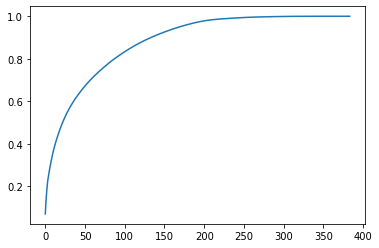

In [ ]:
#PCA
pca = PCA(n_components=None)
pca.fit(X_obuka_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
X_obuka_pca = pca.transform(X_obuka_std)
X_test_pca = pca.transform(X_test_std)
pca_dimenzije = pca.n_components_
print('Redukovani prostor ima dimenziju: ', pca_dimenzije)

In [ ]:
#PCA
labels_y = ['M', 'F']
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
acc = []
iteracija = 0 
for k in [1,5,15,25,35]:
     for m in ['euclidean', 'manhattan','chebyshev','hamming']:
         for l in ['uniform','distance']:
            for p in [125,150,175,200]:
                indexes = kf.split(X_obuka, y_obuka)
                acc_tmp = []
                fin_conf_mat = np.zeros((len(np.unique(y_obuka)),len(np.unique(y_obuka))))
                for train_index, test_index in indexes:
                        iteracija += 1
                        X_std1 = s.fit_transform(X_obuka.iloc[train_index,:])
                        X_std_test = s.transform(X_obuka.iloc[test_index,:])
                        pca = PCA(n_components=p)
                        pca.fit(X_std1)
                        X_train_r = pca.transform(X_std1)
                        X_test_r=pca.transform(X_std_test)
                        classifier = KNeighborsClassifier(n_neighbors=k, metric=m,weights=l)
                        classifier.fit(X_train_r, y_obuka.iloc[train_index])
                        y_pred = classifier.predict(X_test_r)
                        acc_tmp.append(accuracy_score(y_obuka.iloc[test_index], y_pred))
                        fin_conf_mat += confusion_matrix(y_obuka.iloc[test_index], y_pred, labels=labels_y)
                print(int(iteracija/10))
                print('za parametre  n_components=',p ,' k=', k, ' i m=', m, 'weigth je:',l,' tacnost je: ', np.mean(acc_tmp), ' a mat. konf. je:')
                print(fin_conf_mat)
                acc.append(np.mean(acc_tmp))
print('najbolja tacnost je u iteraciji broj: ', np.argmax(acc))

1
za parametre  n_components= 125  k= 1  i m= euclidean weigth je: uniform  tacnost je:  0.9755307724080957  a mat. konf. je:
[[1360.   38.]
 [  28. 1272.]]
2
za parametre  n_components= 150  k= 1  i m= euclidean weigth je: uniform  tacnost je:  0.9755307724080959  a mat. konf. je:
[[1358.   40.]
 [  26. 1274.]]
3
za parametre  n_components= 175  k= 1  i m= euclidean weigth je: uniform  tacnost je:  0.9755321492496215  a mat. konf. je:
[[1360.   38.]
 [  28. 1272.]]
4
za parametre  n_components= 200  k= 1  i m= euclidean weigth je: uniform  tacnost je:  0.9744155307724082  a mat. konf. je:
[[1359.   39.]
 [  30. 1270.]]
5
za parametre  n_components= 125  k= 1  i m= euclidean weigth je: distance  tacnost je:  0.9777585019964203  a mat. konf. je:
[[1361.   37.]
 [  23. 1277.]]
6
za parametre  n_components= 150  k= 1  i m= euclidean weigth je: distance  tacnost je:  0.9759038964615174  a mat. konf. je:
[[1360.   38.]
 [  27. 1273.]]
7
za parametre  n_components= 175  k= 1  i m= euclidean 

In [ ]:
#PCA
labels_y = ['M', 'F']
pca_conf_mat_knn = np.zeros((len(np.unique(y_obuka)),len(np.unique(y_obuka))))

s = StandardScaler()
#s.fit(X_obuka)
X_obuka_std = s.fit_transform(X_obuka)
X_test_std = s.fit_transform(X_test)

pca = PCA(n_components=125)
pca.fit(X_obuka_std)
X_obuka_PCA = pca.transform(X_obuka_std)
X_test_PCA = pca.transform(X_test_std)

classifier_kon = KNeighborsClassifier(n_neighbors=25, metric='euclidean',weights='uniform')
classifier_kon.fit(X_obuka_PCA, y_obuka)
   
# testiranje
y_pred_kon = classifier_kon.predict(X_test_PCA) 

pca_conf_mat_knn = confusion_matrix(y_test, y_pred_kon, labels=labels_y)

print(pca_conf_mat_knn)

evaluation_classif(pca_conf_mat_knn)

[[184   0]
 [ 61 429]]
precision:  1.0
accuracy:  0.9094955489614244
sensitivity/recall:  0.8755102040816326
specificity:  1.0
F score:  0.9336235038084874


In [ ]:
# #ODABIR PARAMETARA ZA KNN METODU SA STANDARDIZOVANIM VREDNOSTIMA NA CELOM SKUPU - FOR PETLJA
labels_y = ['M', 'F']
s = StandardScaler()
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
acc = []
iteracija = 0 
for k in [1,5,15,25,35]:
     for m in ['euclidean', 'manhattan','chebyshev','hamming']:
         for l in ['uniform','distance']:
             indexes = kf.split(X_obuka, y_obuka)
             acc_tmp = []
             fin_conf_mat = np.zeros((len(np.unique(y_obuka)),len(np.unique(y_obuka))))
             for train_index, test_index in indexes:
                 iteracija += 1
                 pd.set_option('display.max_rows', None)
                 #print(X_obuka.iloc[train_index,:].dtypes)
                 classifier = KNeighborsClassifier(n_neighbors=k, metric=m,weights=l)  
                 X_std1 = s.fit_transform(X_obuka.iloc[train_index,:])
                 X_std_test = s.transform(X_obuka.iloc[test_index,:])
                 classifier.fit(X_std1, y_obuka.iloc[train_index])
                 #classifier.fit(X_obuka[train_index, :], y_train.iloc[train_index])
                 y_pred = classifier.predict(X_std_test)
                 acc_tmp.append(accuracy_score(y_obuka.iloc[test_index], y_pred))
                 fin_conf_mat += confusion_matrix(y_obuka.iloc[test_index], y_pred, labels=labels_y)
             print(int(iteracija/10))
             print('za parametre k=', k, ' i m=', m, 'weigth je:',l,' tacnost je: ', np.mean(acc_tmp), ' a mat. konf. je:')
             print(fin_conf_mat)
             acc.append(np.mean(acc_tmp))
print('najbolja tacnost je u iteraciji broj: ', np.argmax(acc))

In [ ]:
#LDA
labels_y = ['M', 'F']
lda_conf_mat_knn = np.zeros((len(np.unique(y_obuka)),len(np.unique(y_obuka))))

s = StandardScaler()
#s.fit(X_obuka)
X_obuka_std = s.fit_transform(X_obuka)
X_test_std = s.transform(X_test)

lda = LinearDiscriminantAnalysis(n_components=1)
lda.fit(X_obuka_std, y_obuka)
X_obuka_LDA = lda.transform(X_obuka_std)
X_test_LDA = lda.transform(X_test_std)

classifier_kon = KNeighborsClassifier(n_neighbors=15, metric='euclidean',weights='distance')
classifier_kon.fit(X_obuka_LDA, y_obuka)
   
# testiranje
y_pred_kon = classifier_kon.predict(X_test_LDA) 

lda_conf_mat_knn = confusion_matrix(y_test, y_pred_kon, labels=labels_y)

print(lda_conf_mat_knn)

evaluation_classif(lda_conf_mat_knn)

[[170  14]
 [ 29 461]]
precision:  0.9705263157894737
accuracy:  0.9362017804154302
sensitivity/recall:  0.9408163265306122
specificity:  0.9239130434782609
F score:  0.955440414507772
